In [103]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

# 1. Load Data

In [104]:
def read_multi(file_list):
    '''
    take a list of files concat it together.
    
    '''
    
    list_df = []
    
    for file in (file_list):
        df = pd.read_csv(file, sep=',', header=0)
        
        df['Sea'] = file.split('.')[0]
        
        list_df.append(df)
    
    total_df = pd.concat(list_df, axis=0)
    
    return total_df

In [105]:
file_list = ['2010-2011.txt', '2011-2012.txt', '2012-2013.txt', '2013-2014.txt', '2014-2015.txt',
             '2015-2016.txt', '2016-2017.txt', '2017-2018.txt', '2018-2019.txt', '2019-2020.txt']

df = read_multi(file_list)

In [106]:
df = df.drop(['Rk', 'Player', 'Age', 'Tm','GS', 'TRB'], axis=1)

df.head()

,Pos,G,MP,FG,FGA,FG%,3P,3PA,3P%,2P,...,FT%,ORB,DRB,AST,STL,BLK,TOV,PF,PTS,Sea
0,PF,23,8.5,1.0,2.3,0.426,0.0,0.0,NaN,1.0,...,0.579,1.0,1.5,0.4,0.2,0.2,0.4,1.2,2.5,2010-2011
1,SG,69,33.7,4.5,9.1,0.498,1.5,3.6,0.423,3.0,...,0.847,0.7,3.0,2.4,0.5,0.4,1.0,2.2,12.6,2010-2011
2,SG,4,7.3,1.5,2.8,0.545,0.8,1.0,0.750,0.8,...,NaN,0.0,0.5,0.3,0.3,0.0,1.0,1.0,3.8,2010-2011
3,C,34,10.0,1.7,3.9,0.444,0.4,1.0,0.353,1.4,...,0.722,0.5,1.8,0.3,0.3,0.6,0.5,2.1,4.2,2010-2011
4,C,12,4.9,0.3,1.3,0.200,0.0,0.0,NaN,0.3,...,0.000,0.6,0.6,0.2,0.2,0.2,0.3,0.4,0.5,2010-2011


In [107]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4934 entries, 0 to 528
Data columns (total 25 columns):
Pos     4934 non-null object
G       4934 non-null int64
MP      4934 non-null float64
FG      4934 non-null float64
FGA     4934 non-null float64
FG%     4914 non-null float64
3P      4934 non-null float64
3PA     4934 non-null float64
3P%     4397 non-null float64
2P      4934 non-null float64
2PA     4934 non-null float64
2P%     4890 non-null float64
eFG%    4914 non-null float64
FT      4934 non-null float64
FTA     4934 non-null float64
FT%     4733 non-null float64
ORB     4934 non-null float64
DRB     4934 non-null float64
AST     4934 non-null float64
STL     4934 non-null float64
BLK     4934 non-null float64
TOV     4934 non-null float64
PF      4934 non-null float64
PTS     4934 non-null float64
Sea     4934 non-null object
dtypes: float64(22), int64(1), object(2)
memory usage: 1002.2+ KB


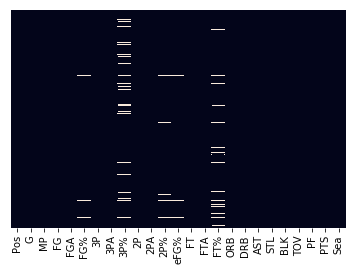

In [108]:
# visualize missing values
sns.heatmap(df.isnull(),yticklabels=False,cbar=False)

#### Clean Missing Values

In [109]:
df.loc[df['3P%'].isnull()].head()

,Pos,G,MP,FG,FGA,FG%,3P,3PA,3P%,2P,...,FT%,ORB,DRB,AST,STL,BLK,TOV,PF,PTS,Sea
0,PF,23,8.5,1.0,2.3,0.426,0.0,0.0,NaN,1.0,...,0.579,1.0,1.5,0.4,0.2,0.2,0.4,1.2,2.5,2010-2011
4,C,12,4.9,0.3,1.3,0.200,0.0,0.0,NaN,0.3,...,0.000,0.6,0.6,0.2,0.2,0.2,0.3,0.4,0.5,2010-2011
5,C,18,7.9,0.4,0.8,0.533,0.0,0.0,NaN,0.4,...,0.500,0.7,1.2,0.2,0.3,0.4,0.4,1.7,1.0,2010-2011
7,PF,18,9.9,0.6,1.7,0.355,0.0,0.0,NaN,0.6,...,0.500,0.7,1.1,0.2,0.1,0.2,0.2,1.7,1.3,2010-2011
11,PF,46,15.0,1.8,4.0,0.454,0.0,0.0,NaN,1.8,...,0.391,1.8,2.3,0.4,0.3,0.7,0.5,1.9,4.3,2010-2011


In [110]:
df.loc[df['3P%'].isnull()]['3P'].unique()

array([0.])

In [111]:
df.loc[df['3P%'].isnull()]['3PA'].unique()

array([0.])

In [112]:
df.loc[df['FT%'].isnull()].head()

,Pos,G,MP,FG,FGA,FG%,3P,3PA,3P%,2P,...,FT%,ORB,DRB,AST,STL,BLK,TOV,PF,PTS,Sea
2,SG,4,7.3,1.5,2.8,0.545,0.8,1.0,0.750,0.8,...,NaN,0.0,0.5,0.3,0.3,0.0,1.0,1.0,3.8,2010-2011
57,PF,3,11.0,1.3,5.3,0.250,0.0,1.7,0.000,1.3,...,NaN,0.7,0.7,0.3,0.3,0.0,0.0,1.0,2.7,2010-2011
96,C,4,4.5,0.5,0.8,0.667,0.0,0.0,NaN,0.5,...,NaN,0.0,0.8,0.0,0.0,0.3,0.3,0.3,1.0,2010-2011
126,SF,3,4.3,0.3,1.3,0.250,0.0,0.3,0.000,0.3,...,NaN,0.0,1.0,0.3,0.0,0.0,0.0,0.7,0.7,2010-2011
175,SG,8,11.5,2.1,4.4,0.486,0.9,2.4,0.368,1.3,...,NaN,0.4,1.5,0.3,0.3,0.1,0.6,0.9,5.1,2010-2011


In [113]:
df.loc[df['FT%'].isnull()]['FT'].unique()

array([0.])

In [114]:
df.loc[df['FT%'].isnull()]['FTA'].unique()

array([0.])

In [115]:
df.loc[df['FG%'].isnull()]

,Pos,G,MP,FG,FGA,FG%,3P,3PA,3P%,2P,...,FT%,ORB,DRB,AST,STL,BLK,TOV,PF,PTS,Sea
256,PF,1,2.0,0.0,0.0,NaN,0.0,0.0,NaN,0.0,...,NaN,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,2010-2011
370,C,2,3.0,0.0,0.0,NaN,0.0,0.0,NaN,0.0,...,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2010-2011
431,C,1,2.0,0.0,0.0,NaN,0.0,0.0,NaN,0.0,...,NaN,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,2010-2011
72,SG,1,6.0,0.0,0.0,NaN,0.0,0.0,NaN,0.0,...,NaN,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,2012-2013
210,SF,2,0.0,0.0,0.0,NaN,0.0,0.0,NaN,0.0,...,NaN,0.0,0.5,0.0,0.0,0.0,0.0,0.0,0.0,2012-2013
90,SF,4,6.0,0.0,0.0,NaN,0.0,0.0,NaN,0.0,...,NaN,0.0,0.8,0.5,0.3,0.0,0.3,0.3,0.0,2013-2014
398,PG,2,1.0,0.0,0.0,NaN,0.0,0.0,NaN,0.0,...,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2013-2014
43,PF,2,1.5,0.0,0.0,NaN,0.0,0.0,NaN,0.0,...,NaN,0.5,1.0,0.0,0.0,0.0,0.5,0.0,0.0,2014-2015
446,C,2,9.5,0.0,0.0,NaN,0.0,0.0,NaN,0.0,...,NaN,0.0,0.5,1.0,0.0,0.0,0.0,0.0,0.0,2014-2015
111,PF,3,2.0,0.0,0.0,NaN,0.0,0.0,NaN,0.0,...,NaN,0.0,0.3,0.0,0.3,0.0,0.0,0.0,0.0,2015-2016


In [116]:
df.loc[df['2P%'].isnull()].head()

,Pos,G,MP,FG,FGA,FG%,3P,3PA,3P%,2P,...,FT%,ORB,DRB,AST,STL,BLK,TOV,PF,PTS,Sea
256,PF,1,2.0,0.0,0.0,NaN,0.0,0.0,NaN,0.0,...,NaN,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,2010-2011
369,SF,2,8.0,0.0,1.5,0.0,0.0,1.5,0.0,0.0,...,NaN,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,2010-2011
370,C,2,3.0,0.0,0.0,NaN,0.0,0.0,NaN,0.0,...,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2010-2011
431,C,1,2.0,0.0,0.0,NaN,0.0,0.0,NaN,0.0,...,NaN,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,2010-2011
72,SG,1,6.0,0.0,0.0,NaN,0.0,0.0,NaN,0.0,...,NaN,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,2012-2013


In [117]:
df.loc[df['2P%'].isnull()]['2P'].unique()

array([0.])

In [118]:
df.loc[df['2P%'].isnull()]['2PA'].unique()

array([0.])

In [119]:
df.loc[df['eFG%'].isnull()]

,Pos,G,MP,FG,FGA,FG%,3P,3PA,3P%,2P,...,FT%,ORB,DRB,AST,STL,BLK,TOV,PF,PTS,Sea
256,PF,1,2.0,0.0,0.0,NaN,0.0,0.0,NaN,0.0,...,NaN,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,2010-2011
370,C,2,3.0,0.0,0.0,NaN,0.0,0.0,NaN,0.0,...,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2010-2011
431,C,1,2.0,0.0,0.0,NaN,0.0,0.0,NaN,0.0,...,NaN,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,2010-2011
72,SG,1,6.0,0.0,0.0,NaN,0.0,0.0,NaN,0.0,...,NaN,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,2012-2013
210,SF,2,0.0,0.0,0.0,NaN,0.0,0.0,NaN,0.0,...,NaN,0.0,0.5,0.0,0.0,0.0,0.0,0.0,0.0,2012-2013
90,SF,4,6.0,0.0,0.0,NaN,0.0,0.0,NaN,0.0,...,NaN,0.0,0.8,0.5,0.3,0.0,0.3,0.3,0.0,2013-2014
398,PG,2,1.0,0.0,0.0,NaN,0.0,0.0,NaN,0.0,...,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2013-2014
43,PF,2,1.5,0.0,0.0,NaN,0.0,0.0,NaN,0.0,...,NaN,0.5,1.0,0.0,0.0,0.0,0.5,0.0,0.0,2014-2015
446,C,2,9.5,0.0,0.0,NaN,0.0,0.0,NaN,0.0,...,NaN,0.0,0.5,1.0,0.0,0.0,0.0,0.0,0.0,2014-2015
111,PF,3,2.0,0.0,0.0,NaN,0.0,0.0,NaN,0.0,...,NaN,0.0,0.3,0.0,0.3,0.0,0.0,0.0,0.0,2015-2016


In [120]:
df.loc[df['eFG%'].isnull()][['FG','3P','FGA']]

,FG,3P,FGA
256,0.0,0.0,0.0
370,0.0,0.0,0.0
431,0.0,0.0,0.0
72,0.0,0.0,0.0
210,0.0,0.0,0.0
90,0.0,0.0,0.0
398,0.0,0.0,0.0
43,0.0,0.0,0.0
446,0.0,0.0,0.0
111,0.0,0.0,0.0


Since most of them are just zero, all the missing values will be replace to zero.

In [121]:
df.fillna(0.0, inplace=True)

In [122]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4934 entries, 0 to 528
Data columns (total 25 columns):
Pos     4934 non-null object
G       4934 non-null int64
MP      4934 non-null float64
FG      4934 non-null float64
FGA     4934 non-null float64
FG%     4934 non-null float64
3P      4934 non-null float64
3PA     4934 non-null float64
3P%     4934 non-null float64
2P      4934 non-null float64
2PA     4934 non-null float64
2P%     4934 non-null float64
eFG%    4934 non-null float64
FT      4934 non-null float64
FTA     4934 non-null float64
FT%     4934 non-null float64
ORB     4934 non-null float64
DRB     4934 non-null float64
AST     4934 non-null float64
STL     4934 non-null float64
BLK     4934 non-null float64
TOV     4934 non-null float64
PF      4934 non-null float64
PTS     4934 non-null float64
Sea     4934 non-null object
dtypes: float64(22), int64(1), object(2)
memory usage: 1002.2+ KB


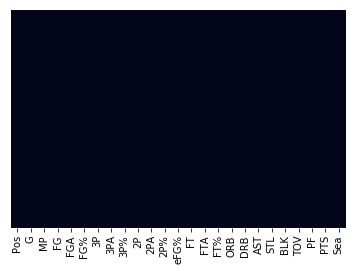

In [123]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False)

In [124]:
df.describe()

,G,MP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,...,FTA,FT%,ORB,DRB,AST,STL,BLK,TOV,PF,PTS
count,4934.000000,4934.000000,4934.000000,4934.000000,4934.000000,4934.000000,4934.000000,4934.000000,4934.000000,4934.000000,...,4934.000000,4934.000000,4934.000000,4934.000000,4934.000000,4934.000000,4934.000000,4934.000000,4934.000000,4934.000000
mean,50.685651,19.958999,3.085083,6.869619,0.437904,0.706871,2.024463,0.263031,2.379003,4.845561,...,1.847771,0.701088,0.880178,2.672902,1.826388,0.633036,0.401257,1.136015,1.731800,8.266173
std,24.838319,9.333361,2.122899,4.479744,0.102178,0.739222,1.930579,0.165856,1.832841,3.562652,...,1.654338,0.202965,0.799189,1.793212,1.775215,0.425132,0.430749,0.787062,0.761367,5.841361
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,31.000000,12.500000,1.400000,3.400000,0.400000,0.000000,0.300000,0.161000,1.000000,2.100000,...,0.700000,0.645000,0.300000,1.400000,0.600000,0.300000,0.100000,0.600000,1.200000,3.800000
50%,57.000000,19.500000,2.600000,5.900000,0.438000,0.500000,1.600000,0.320000,1.900000,3.900000,...,1.400000,0.750000,0.600000,2.300000,1.200000,0.600000,0.300000,1.000000,1.800000,6.900000
75%,72.000000,27.700000,4.300000,9.500000,0.485000,1.100000,3.275000,0.369000,3.300000,6.700000,...,2.500000,0.821000,1.200000,3.500000,2.400000,0.900000,0.500000,1.500000,2.300000,11.600000
max,83.000000,42.000000,10.900000,24.500000,1.000000,5.100000,13.200000,1.000000,9.700000,20.400000,...,11.800000,1.000000,5.500000,11.400000,11.700000,2.500000,3.700000,5.700000,6.000000,36.100000


In [125]:
df['Pos'].unique()

array(['PF', 'SG', 'C', 'SF', 'PG', 'SF-SG', 'PG-SG', 'C-PF', 'PF-SF',
       'SG-PG', 'SF-PF', 'SG-SF', 'PF-C', 'SG-PF', 'SF-C'], dtype=object)

Due to there are hybrid positions stated, it will need to be remove/altered for this dataset. I choose to create a copy of the same column but with the hybrid position remove. The reason is I felt that that data might be useful in another way.

In [126]:
df['PosHy'] = df['Pos']

In [127]:
df['Pos'] = df['Pos'].apply(lambda x: x.split('-')[0] if '-' in x else x)

In [128]:
df['Pos'].unique()

array(['PF', 'SG', 'C', 'SF', 'PG'], dtype=object)

The hybrid positions have been altered.

# 2. EDA

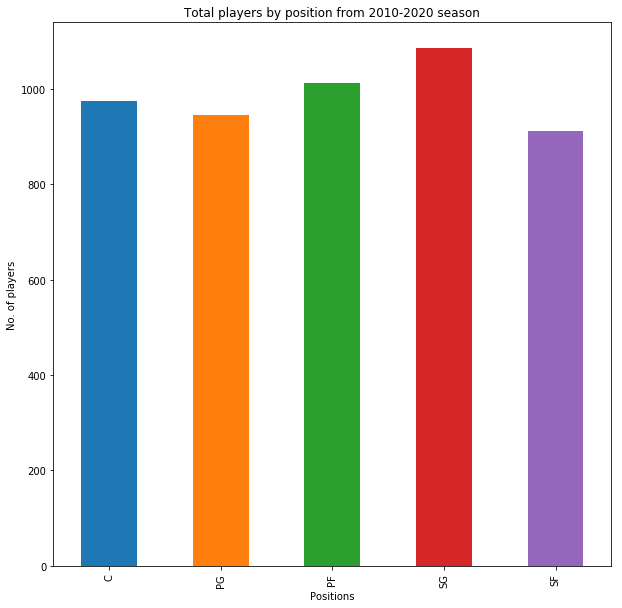

In [129]:
fig = plt.figure(figsize=(10,10))

df['Pos'].value_counts(sort=False).plot(kind='bar')
plt.xlabel('Positions')
plt.ylabel('No. of players')
plt.title('Total players by position from 2010-2020 season')
plt.show()

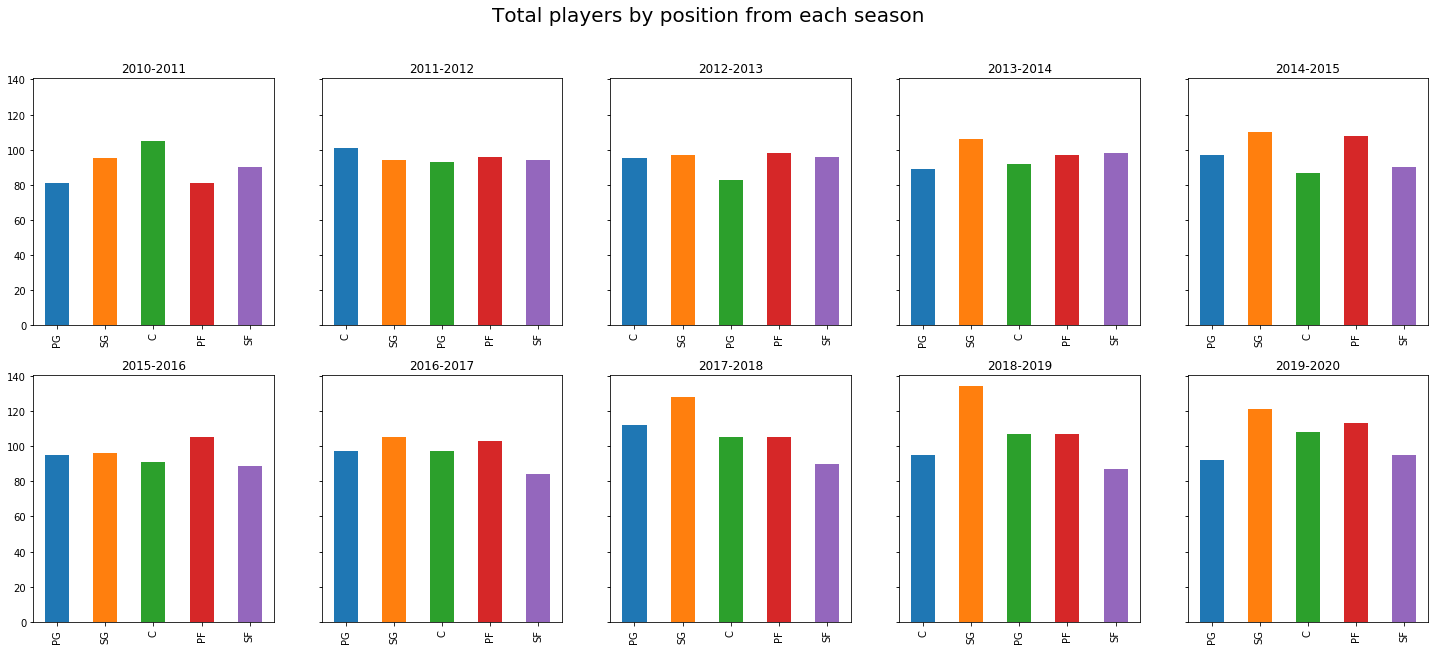

In [130]:
fig, axes = plt.subplots(2,5, figsize=(25,10), sharey=True)

for ax, season in zip(axes.flatten(), df['Sea'].unique()):
    df[df['Sea']==season]['Pos'].value_counts(sort=False).plot(kind='bar', ax=ax)
    ax.set_title(season)
    
fig.suptitle('Total players by position from each season', fontsize=20)
plt.show()

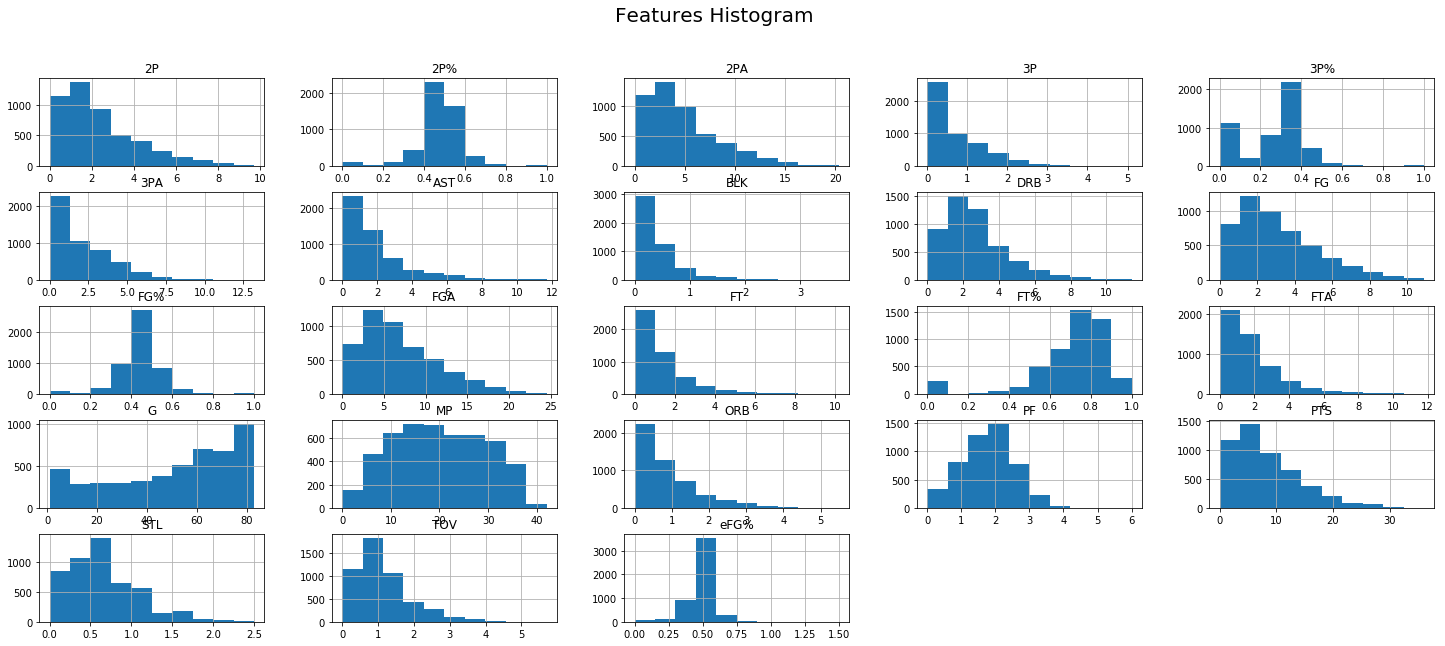

In [131]:
df.hist(figsize=(25,10))
plt.suptitle('Features Histogram', fontsize=20)
plt.show()

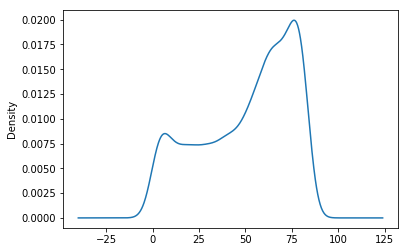

In [132]:
df['G'].plot(kind='kde')

Based on the histogram, a large number of players played above 50 games

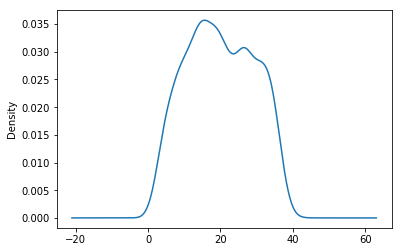

In [133]:
df['MP'].plot(kind='kde')

Based on this histogram, players tend to play at an average minutes of 15 to 30 minutes.

C:\Users\USER\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


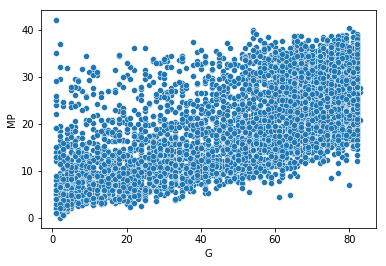

In [134]:
sns.scatterplot(df['G'], df['MP'])

Looking at the scatterplot between games played and minutes played, players who play more than 40 games have played around near 10 minutes and above.
Based on these three visualizations, I would filtered out players who only play 40 or more games with a playing time of 10 minutes and above as the dataset. This is to remove some outliers like injured players or benchwarmers or players who occasionally play only.

In [135]:
df = df[(df['G']>= 40) & (df['MP']>=10)]

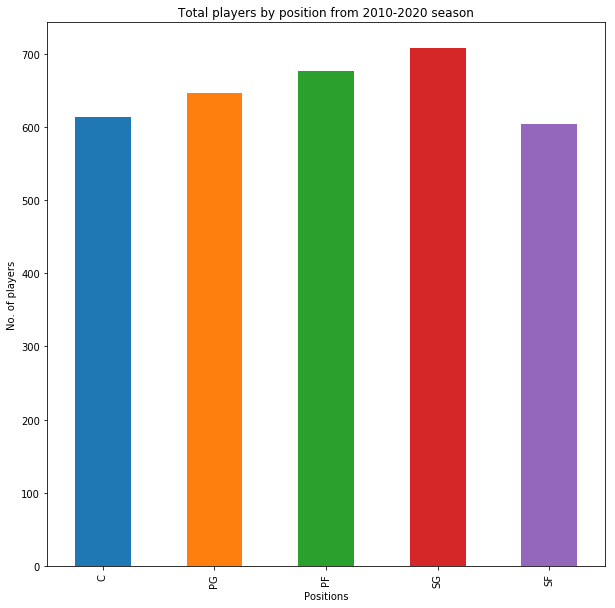

In [136]:
fig = plt.figure(figsize=(10,10))

df['Pos'].value_counts(sort=False).plot(kind='bar')
plt.xlabel('Positions')
plt.ylabel('No. of players')
plt.title('Total players by position from 2010-2020 season')
plt.show()

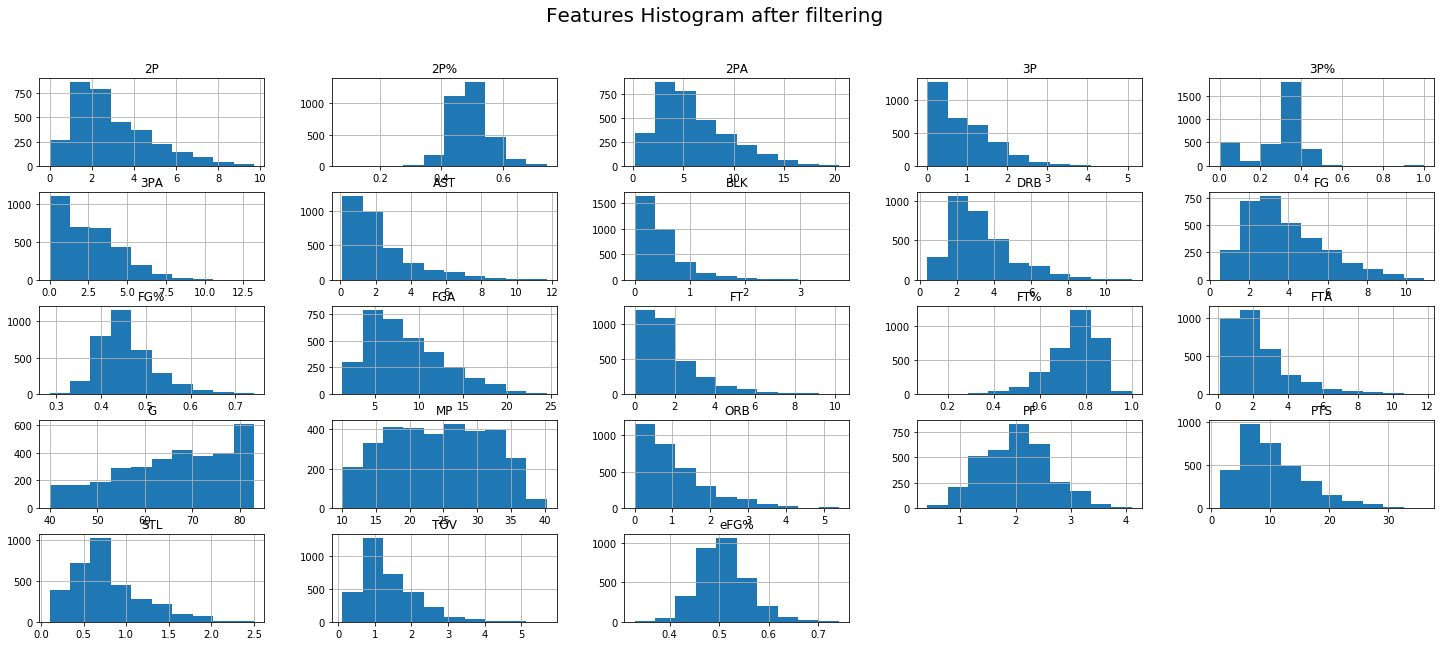

In [137]:
df.hist(figsize=(25,10))
plt.suptitle('Features Histogram after filtering', fontsize=20)
plt.show()

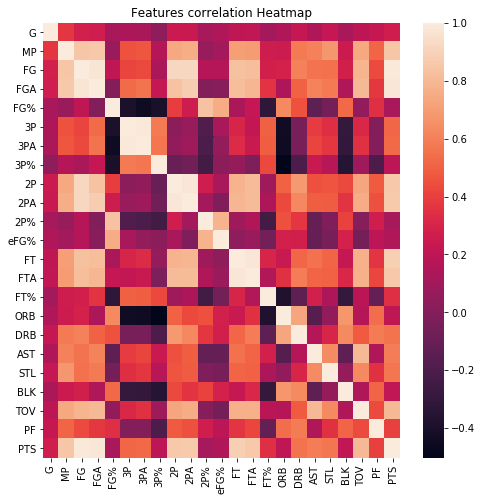

In [138]:
plt.figure(figsize=(8,8))

sns.heatmap(df.corr())

plt.title('Features correlation Heatmap')
plt.show()

In [139]:
c = df[df['Pos']=='C']

pg = df[df['Pos']=='PG']

sf = df[df['Pos']=='SF']

sg = df[df['Pos']=='SG']

pf = df[df['Pos']=='PF']

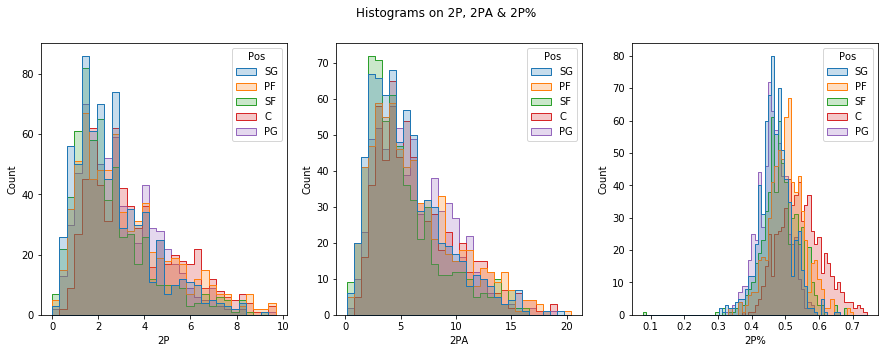

In [140]:
fig, axes = plt.subplots(1,3, figsize=(15,5))

for n, ax in zip(['2P','2PA','2P%'], axes):
    sns.histplot(data=df , x=n, hue='Pos', element='step', ax=ax)
    
fig.suptitle('Histograms on 2P, 2PA & 2P%')
plt.show()

Based on the histograms, centers tend to shoot more 2's as well as having a high percentage of making them. This is due to them playing under the basket more.

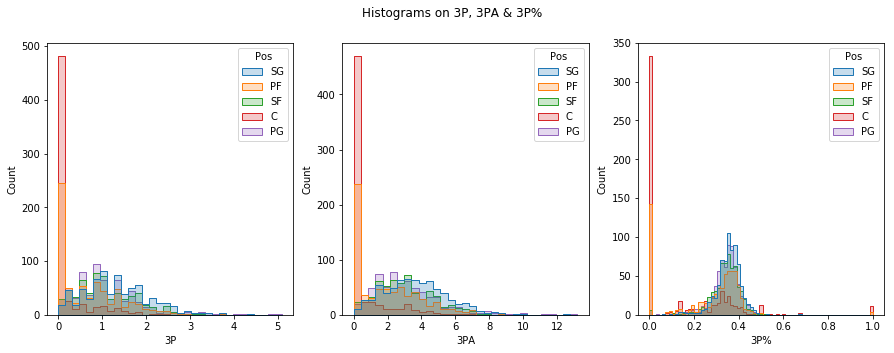

In [141]:
fig, axes = plt.subplots(1,3, figsize=(15,5))

for n, ax in zip(['3P','3PA','3P%'], axes):
    sns.histplot(data=df , x=n, hue='Pos', element='step', ax=ax)
    
fig.suptitle('Histograms on 3P, 3PA & 3P%')
plt.show()

A high volume of players who are center and power forward doesn't shoot 3's. 

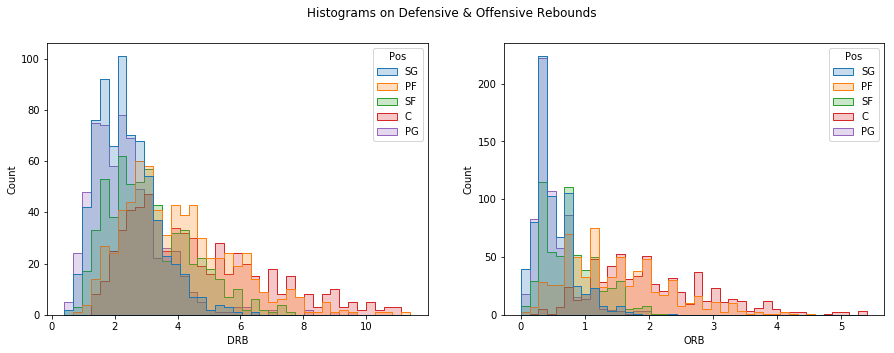

In [142]:
fig, axes = plt.subplots(1,2, figsize=(15,5))

for n, ax in zip(['DRB','ORB'], axes):
    sns.histplot(data=df , x=n, hue='Pos', element='step', ax=ax)
    
fig.suptitle('Histograms on Defensive & Offensive Rebounds')
plt.show()

Guards (pont guards and shooting guards) tend to have less rebounds as compare to the other positions.

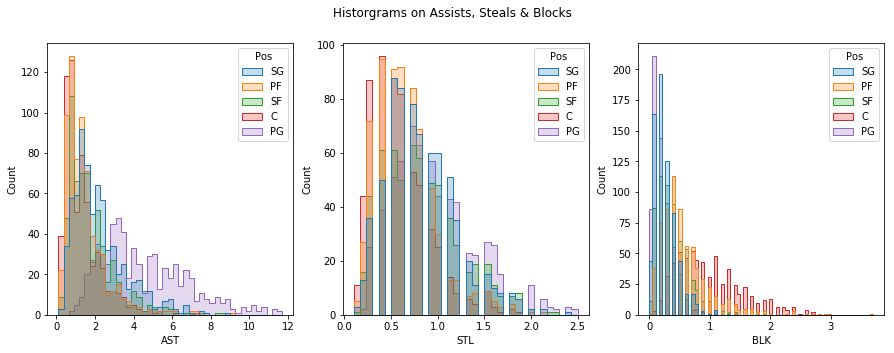

In [143]:
fig, axes = plt.subplots(1,3, figsize=(15,5))

for n, ax in zip(['AST','STL','BLK'], axes):
    sns.histplot(data=df , x=n, hue='Pos', element='step', ax=ax)
    
fig.suptitle('Historgrams on Assists, Steals & Blocks')
plt.show()

Point guards have more assists while centers have more blocks. These distinctions might help in classifying between point guards and centers.

# 3. Dummy Classifier
A dummy classifier will be use as a baseline for this classification problem.

In [144]:
X = df.drop(['Pos','PosHy','Sea'],axis=1)

y = df['Pos']

In [145]:
# split the data
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y,  test_size=0.3, random_state=101)

In [146]:
from sklearn.dummy import DummyClassifier

from sklearn.metrics import classification_report, confusion_matrix

In [147]:
dummy = DummyClassifier(strategy='most_frequent', random_state=101)

dummy.fit(X_train, y_train)

dumb_pred = dummy.predict(X_test)

print(f'Training score: {dummy.score(X_train, y_train)}')
print(f'Test score: {dummy.score(X_test, y_test)}')

Training score: 0.21381434227892654
Test score: 0.2276923076923077


In [148]:
print(classification_report(y_test, dumb_pred))

             precision    recall  f1-score   support

          C       0.00      0.00      0.00       184
         PF       0.00      0.00      0.00       218
         PG       0.00      0.00      0.00       186
         SF       0.00      0.00      0.00       165
         SG       0.23      1.00      0.37       222

avg / total       0.05      0.23      0.08       975



C:\Users\USER\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


# 4. Model
Four types of models will be used. Decision Tree, Random Forest, KNN and Support Vector Machines.

In [149]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

In [150]:
models = []

models.append(('DTC', DecisionTreeClassifier(random_state=101)))
models.append(('RFC', RandomForestClassifier(random_state=101)))
models.append(('KNN', KNeighborsClassifier(n_neighbors=1)))
models.append(('SVM',SVC()))

The models will undergo cross validation and their scores will be compared among each other.

In [151]:
from sklearn.model_selection import StratifiedKFold, cross_val_score

In [152]:
results = []
names = []

for name, model in models:
    skfold = StratifiedKFold(n_splits=10,random_state=101, shuffle=True)
    cv_results = cross_val_score(model, X_train, y_train, cv=skfold, scoring='accuracy')

    results.append(cv_results)
    names.append(name)
    print(f'{name}: {cv_results.mean()} ({cv_results.std()})')

DTC: 0.5706324968008497 (0.02338906397411585)
RFC: 0.637941732718604 (0.02504748782522367)
KNN: 0.45747856324240754 (0.03595710682197391)
SVM: 0.5657110710775614 (0.036644805402140136)


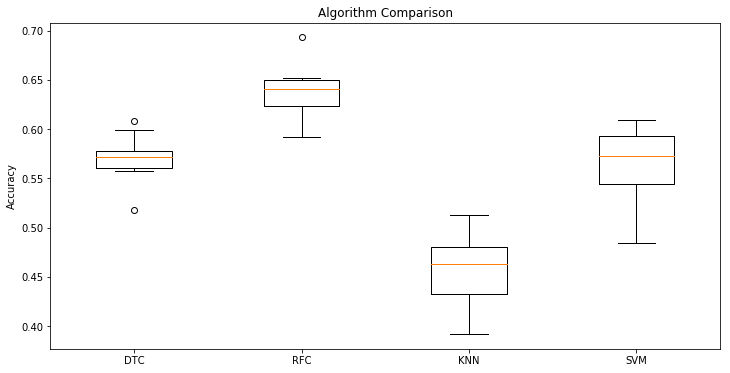

In [153]:
plt.figure(figsize=(12,6))
plt.boxplot(results, labels=names)
plt.title('Algorithm Comparison')
plt.ylabel('Accuracy')
plt.show()

It can be seen that Random Forest (RFC) produce the best result among the four. So, this model will be chosen for evaluation and validation.

## 4.1 Evaluation & Validation

In [154]:
rfc = RandomForestClassifier(max_features=1, random_state=101)

rfc.fit(X_train, y_train)

pred = rfc.predict(X_test)

print(f'Training score: {rfc.score(X_train, y_train)}')
print(f'Test score: {rfc.score(X_test, y_test)}')

Training score: 0.9863616366036075
Test score: 0.5753846153846154


Looks like there is overfitting.

In [155]:
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

[[144  33   1   6   0]
 [ 59  97   4  48  10]
 [  1   6 150   5  24]
 [ 11  36  19  67  32]
 [  0  14  54  51 103]]
             precision    recall  f1-score   support

          C       0.67      0.78      0.72       184
         PF       0.52      0.44      0.48       218
         PG       0.66      0.81      0.72       186
         SF       0.38      0.41      0.39       165
         SG       0.61      0.46      0.53       222

avg / total       0.57      0.58      0.57       975



Looking at the feature importance to identify which feature has more impact to further improve the model.

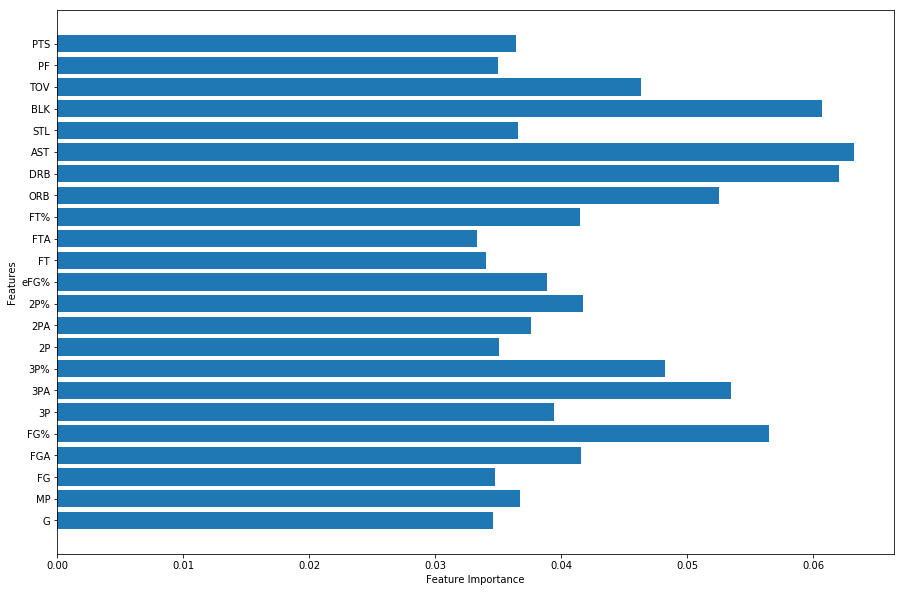

In [156]:
plt.figure(figsize=(15,10))

plt.barh(range(X.shape[1]), rfc.feature_importances_, align='center')

plt.yticks(np.arange(X.shape[1]), X.columns.values )
plt.xlabel('Feature Importance')
plt.ylabel('Features')
plt.show()

Looks like most have some impact on it, with only a few shows significant importance. We shall keep all features for now.

### 4.1.1 Grid Search and Cross Validation
The model will undergo grind searching with cross validation to find how many max features needed to produce the best model.

In [157]:
from sklearn.model_selection import GridSearchCV

In [158]:
# find max_features sqrt(23) is 5
param_grid = {'max_features': [n for n in range(1,6)]}

In [159]:
skfold = StratifiedKFold(n_splits=10, random_state=101, shuffle=True)

In [160]:
grid_search = GridSearchCV(RandomForestClassifier(random_state=101), param_grid=param_grid, cv=skfold)

grid_search.fit(X_train, y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=10, random_state=101, shuffle=True),
       error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=101, verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'max_features': [1, 2, 3, 4, 5]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [161]:
grid_search.best_params_

{'max_features': 4}

In [162]:
grid_search.best_score_

0.6379234491860977

In [163]:
rfc = RandomForestClassifier(max_features=4, random_state=101)

rfc.fit(X_train, y_train)

pred = rfc.predict(X_test)

print(f'Training score: {rfc.score(X_train, y_train)}')
print(f'Test score: {rfc.score(X_test, y_test)}')

Training score: 0.9885613726352838
Test score: 0.6133333333333333


In [164]:
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

[[145  35   0   3   1]
 [ 68 101   1  39   9]
 [  1   3 157   3  22]
 [  5  28  12  74  46]
 [  0   9  41  51 121]]
             precision    recall  f1-score   support

          C       0.66      0.79      0.72       184
         PF       0.57      0.46      0.51       218
         PG       0.74      0.84      0.79       186
         SF       0.44      0.45      0.44       165
         SG       0.61      0.55      0.57       222

avg / total       0.61      0.61      0.61       975



After changing the max feature to 4, the model's accuracy has increase.

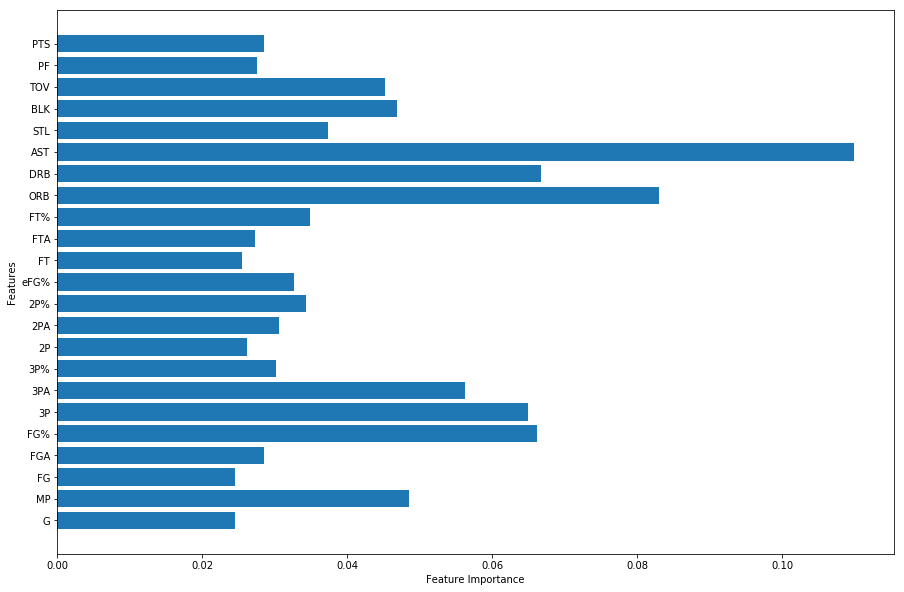

In [165]:
plt.figure(figsize=(15,10))

plt.barh(range(X.shape[1]), rfc.feature_importances_, align='center')

plt.yticks(np.arange(X.shape[1]), X.columns.values )
plt.xlabel('Feature Importance')
plt.ylabel('Features')
plt.show()

By looking at the feature importance after setting the max feature parameter to 4, it can clearly identify a couple of significant features. We shall use this info to create another model, with only features with importance more than 0.04 kept.

# 5. Model 2

In [166]:
fi = pd.DataFrame(rfc.feature_importances_, X.columns.values)

In [167]:
fi[fi[0]<0.04].index

Index(['G', 'FG', 'FGA', '3P%', '2P', '2PA', '2P%', 'eFG%', 'FT', 'FTA', 'FT%',
       'STL', 'PF', 'PTS'],
      dtype='object')

In [168]:
X2 = X.drop(['G', 'FG', 'FGA', '3P%', '2P', '2PA', '2P%', 'eFG%', 'FT', 'FTA', 'FT%', 'STL', 'PF', 'PTS'], axis=1)

In [169]:
X_train, X_test, y_train, y_test = train_test_split(X2, y,  test_size=0.3, random_state=101)

In [170]:
# find max_features sqrt(12) is 4
param_grid = {'max_features': [n for n in range(1,5)]}

## 5.1 Evaluation & Validation
### 5.1.1 Grid Search and Cross Validation

In [171]:
grid_search = GridSearchCV(RandomForestClassifier(random_state=101), param_grid=param_grid, cv=skfold)

grid_search.fit(X_train, y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=10, random_state=101, shuffle=True),
       error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=101, verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'max_features': [1, 2, 3, 4]}, pre_dispatch='2*n_jobs',
       refit=True, return_train_score='warn', scoring=None, verbose=0)

In [172]:
grid_search.best_params_

{'max_features': 4}

In [173]:
grid_search.best_score_

0.6335239771227452

In [174]:
rfc = RandomForestClassifier(max_features=4, random_state=101)

rfc.fit(X_train, y_train)

pred = rfc.predict(X_test)

print(f'Training score: {rfc.score(X_train, y_train)}')
print(f'Test score: {rfc.score(X_test, y_test)}')

Training score: 0.9841619005719313
Test score: 0.6410256410256411


In [175]:
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

[[152  27   0   5   0]
 [ 58 111   4  39   6]
 [  0   4 159   3  20]
 [  4  30  10  80  41]
 [  2   9  41  47 123]]
             precision    recall  f1-score   support

          C       0.70      0.83      0.76       184
         PF       0.61      0.51      0.56       218
         PG       0.74      0.85      0.80       186
         SF       0.46      0.48      0.47       165
         SG       0.65      0.55      0.60       222

avg / total       0.64      0.64      0.64       975



After removing some features and have the max features parameter set to 4, the model's accuracy further improves. The model still can't fully predict well as it has trouble identifying small forwards, power forwards and shooting guards. 

However, it can predict pretty well on point guards and centers. This might be due to the significant difference of play style a point guard and a center has. As point guards tend to run the offense with their shooting either for 2-points or 3-points as well as passing the ball, while centers tend to shoot less 3's and pass but rebounds and blocks the ball more often. The difficulty in classifying small forwards may due to the fact that this position tends to have a more versatile play style when comparing to the other 4 positions. 

From the results gathered, even in this era, the NBA is still not a positionless game.

# 6. Model 3
For this model, the features that will be selected are 2-points (2p & 2PA), 3-points (3P & 3PA), Rebounds, Assists, Steals and Blocks. 

The reason was these six features are usually define what kind of position a player tends to play. For example an average center will have a higher volume of rebounds compare to an average point guard. While Free Throws Percentage for example tends to be diverse among the 5 positions. Hopefully by removing the other features and just focusing on these will yield a better model.

In [176]:
X3 = X[['2P','2PA','3P','3PA','DRB','ORB','AST','STL','BLK']]

In [177]:
X_train, X_test, y_train, y_test = train_test_split(X3, y,  test_size=0.3, random_state=101)

In [178]:
results = []
names = []

for name, model in models:
    skfold = StratifiedKFold(n_splits=10,random_state=101, shuffle=True)
    cv_results = cross_val_score(model, X_train, y_train, cv=skfold, scoring='accuracy')

    results.append(cv_results)
    names.append(name)
    print(f'{name}: {cv_results.mean()} ({cv_results.std()})')

DTC: 0.5759014337983928 (0.028010229732270655)
RFC: 0.6414387050104178 (0.03962869338840892)
KNN: 0.5904490711008155 (0.020525368814442786)
SVM: 0.6647193044011143 (0.032561323696570325)


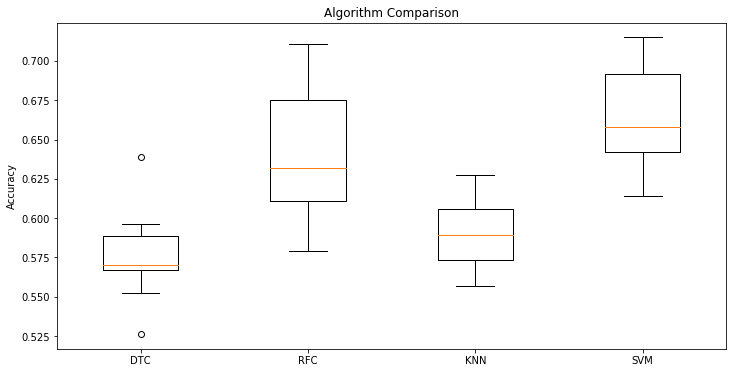

In [179]:
plt.figure(figsize=(12,6))
plt.boxplot(results, labels=names)
plt.title('Algorithm Comparison')
plt.ylabel('Accuracy')
plt.show()

By comparing the four models used before, it can be identified that this time Support Vector Machines tend to have a better score compare to before. Random Forest still shows a better result, and with this information, two of these models will be chosen and tested.

## 6.1 Evaluation & Validation

### 6.1.1 RFC

In [180]:
rfc = RandomForestClassifier(max_features=1, random_state=101)

rfc.fit(X_train,y_train)

pred = rfc.predict(X_test)

print(f'Training score: {rfc.score(X_train, y_train)}')
print(f'Test score: {rfc.score(X_test, y_test)}')

Training score: 0.9876814782226133
Test score: 0.6194871794871795


In [181]:
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

[[142  35   0   7   0]
 [ 65 107   0  43   3]
 [  1   2 152   7  24]
 [  3  24  13  87  38]
 [  1   5  44  56 116]]
             precision    recall  f1-score   support

          C       0.67      0.77      0.72       184
         PF       0.62      0.49      0.55       218
         PG       0.73      0.82      0.77       186
         SF       0.43      0.53      0.48       165
         SG       0.64      0.52      0.58       222

avg / total       0.62      0.62      0.62       975



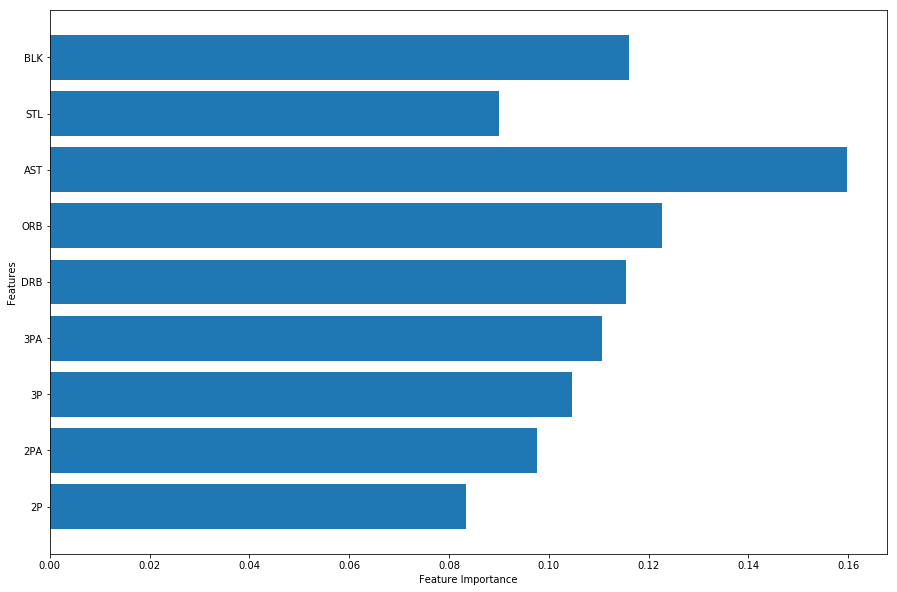

In [182]:
plt.figure(figsize=(15,10))

plt.barh(range(X3.shape[1]), rfc.feature_importances_, align='center')

plt.yticks(np.arange(X3.shape[1]), X3.columns.values )
plt.xlabel('Feature Importance')
plt.ylabel('Features')
plt.show()

By just using these 9 features, the score for Random Forest has increase from before. This means that the features remove has less impact on the classification of the model.

Now a grid search will be conducted to find the best max feature parameter.

#### Grid Search and Cross Validation

In [183]:
# find max_features sqrt(9) is 3
param_grid = {'max_features': [n for n in range(1,5)]}

In [184]:
grid_search = GridSearchCV(RandomForestClassifier(random_state=101), param_grid=param_grid, cv=skfold)

grid_search.fit(X_train, y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=10, random_state=101, shuffle=True),
       error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=101, verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'max_features': [1, 2, 3, 4]}, pre_dispatch='2*n_jobs',
       refit=True, return_train_score='warn', scoring=None, verbose=0)

In [185]:
grid_search.best_params_

{'max_features': 3}

In [186]:
grid_search.best_score_

0.6414430268367796

In [187]:
rfc = RandomForestClassifier(max_features=3, random_state=101)

rfc.fit(X_train, y_train)

pred = rfc.predict(X_test)

print(f'Training score: {rfc.score(X_train, y_train)}')
print(f'Test score: {rfc.score(X_test, y_test)}')

Training score: 0.9863616366036075
Test score: 0.6461538461538462


In [188]:
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

[[142  36   0   6   0]
 [ 52 111   1  42  12]
 [  1   1 153   7  24]
 [  1  23   7  96  38]
 [  1   3  40  50 128]]
             precision    recall  f1-score   support

          C       0.72      0.77      0.75       184
         PF       0.64      0.51      0.57       218
         PG       0.76      0.82      0.79       186
         SF       0.48      0.58      0.52       165
         SG       0.63      0.58      0.60       222

avg / total       0.65      0.65      0.64       975



After finding the best parameter and only using these 9 features, the model score is almost similar to the Model 2. With this information, we shall look at the Support Vector Machines model.

## 6.1.2 SVM
Due to Support Vector Machines works best when the data is scaled, MinMaxScaler will be use as a scaler.

In [189]:
from sklearn.preprocessing import MinMaxScaler

from sklearn.pipeline import make_pipeline

A pipeline will be implemented to this model to avoid data leakage from scaling during cross validation. At the same time the model will undergo grid searching to find the best parameters for Support Vector Machines.

In [190]:
pipe = make_pipeline(MinMaxScaler(),SVC())

In [191]:
# define parameters for gridsearching
param_grid = {'svc__C': [0.1, 1.0, 10.0, 100.0, 1000.0], 
              'svc__gamma': [0.1 ,1.0, 10.0, 100.0]}

In [192]:
# gridsearching cross-validation with pipepline
grid = GridSearchCV(pipe, param_grid=param_grid, cv=skfold)

grid.fit(X_train, y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=10, random_state=101, shuffle=True),
       error_score='raise',
       estimator=Pipeline(memory=None,
     steps=[('minmaxscaler', MinMaxScaler(copy=True, feature_range=(0, 1))), ('svc', SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))]),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'svc__C': [0.1, 1.0, 10.0, 100.0, 1000.0], 'svc__gamma': [0.1, 1.0, 10.0, 100.0]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [193]:
grid.best_score_

0.6920369555653322

In [194]:
grid.best_params_

{'svc__C': 1.0, 'svc__gamma': 10.0}

In [195]:
pipe = make_pipeline(MinMaxScaler(),SVC(C=1.0, gamma=10.0))

pipe.fit(X_train, y_train)

print(f'Training score: {pipe.score(X_train, y_train)}')
print(f'Test score: {pipe.score(X_test, y_test)}')

Training score: 0.7536295644522657
Test score: 0.6994871794871795


Although from the training score, it can be seen that the model might be underfit but it produce a test score much higher than any of the models tested so far.

In [196]:
pred = pipe.predict(X_test)

# Evaluate predictions
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

[[144  37   0   3   0]
 [ 44 122   0  48   4]
 [  0   0 165   3  18]
 [  1  10   8 110  36]
 [  0   1  31  49 141]]
             precision    recall  f1-score   support

          C       0.76      0.78      0.77       184
         PF       0.72      0.56      0.63       218
         PG       0.81      0.89      0.85       186
         SF       0.52      0.67      0.58       165
         SG       0.71      0.64      0.67       222

avg / total       0.71      0.70      0.70       975



By using SVM with the best parameters chosen, the model able to achieve around 70% accuracy. Although still not as good, it is still significantly better than the other models conducted. 

As it can be seen, point guards and centers are still easily able to 
identify using this model. However, there is an increase in identifying small forwards, power forwards and shooting guards. 

The same reason given in Model 2 might be the reason this model is also having a hard time identifying small forwards. With these information, I think a Height feature might improve the model in classifying the positions, as different positions have a set of range of height associate with the play style a player have. For now SVM is the best model to choose in identifying a player position in the NBA based on a decade worth of data used.

# 7. Final Model

In [197]:
svm_pipe = make_pipeline(MinMaxScaler(),SVC(C=1.0, gamma=10.0))

svm_pipe.fit(X3, y)

Pipeline(memory=None,
     steps=[('minmaxscaler', MinMaxScaler(copy=True, feature_range=(0, 1))), ('svc', SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=10.0, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))])

In [198]:
# small test
kp = [10.3,4.9,1.8,4.9,6.0,1.7,1.4,0.7,2.0]

svm_pipe.predict([kp])

array(['PF'], dtype=object)

A test is conducted on the player Kristaps Porzingis using his career average to identify his position using this model. As it can be seen, the model is able to accurately classified Porzingis as a Power Forward.

How about players before the 2010 era? How well will the model perform?

## 7.1 Unseen data (2004-2005 season)

In [199]:
# pre-processing dataset
unseen = pd.read_csv('2005.txt', sep=',', header=0)

unseen.fillna(0.0, inplace=True)

unseen['Pos'] = unseen['Pos'].apply(lambda x: x.split('-')[0] if '-' in x else x)

unseen = unseen[(unseen['G']>= 40) & (unseen['MP']>=10)]

In [200]:
# seperate dataset
X_un = unseen.drop(['Pos'],axis=1)

X_un = X_un[['2P','2PA','3P','3PA','DRB','ORB','AST','STL','BLK']]

y_un = unseen['Pos']

In [201]:
# prediction
pred_un = svm_pipe.predict(X_un)

print(confusion_matrix(y_un,pred_un))
print(classification_report(y_un,pred_un))

[[46 17  0  2  0]
 [24 30  0 11  0]
 [ 0  0 56  1  5]
 [ 2 17  2 27 13]
 [ 0  4 13 17 34]]
             precision    recall  f1-score   support

          C       0.64      0.71      0.67        65
         PF       0.44      0.46      0.45        65
         PG       0.79      0.90      0.84        62
         SF       0.47      0.44      0.45        61
         SG       0.65      0.50      0.57        68

avg / total       0.60      0.60      0.60       321



Using unseen data, the model only able to predict 60% correctly. Point guards and centers still are able to identify better as compare to the others. Small forwards still pose a problem but there is a significant problem in identifying power forwards too. This might be more bigs playing a stretch-4 or stretch-5 role as compared to the traditional bigs. The amount of 3-point shooting has also increase in the era after 2010 which might also impacted the accuracy as some positions have adapted playing at the 3-point line more.